In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ['trans_type'] =fuel_econ.trans.apply(lambda x: x.split()[0])

### pointplot variations

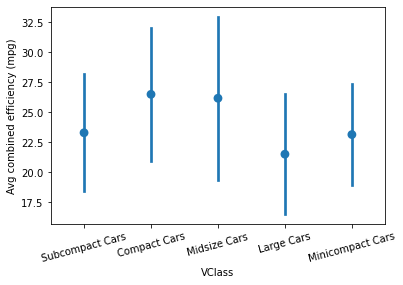

In [22]:
#normal bivariate
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="");
plt.xticks(rotation=15)
plt.ylabel('Avg combined efficiency (mpg)');

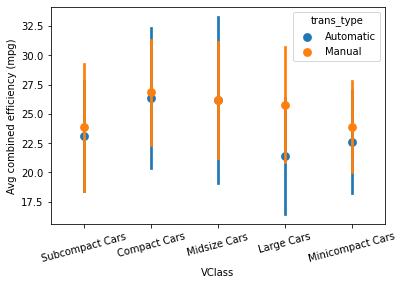

In [23]:
#adding a third variable
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="",
             hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg combined efficiency (mpg)');

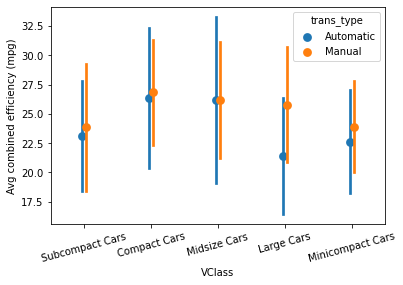

In [24]:
# point plot equivalent of x-jitter
#adding a third variable
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="",
             hue='trans_type', dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Avg combined efficiency (mpg)');

## barplot variation

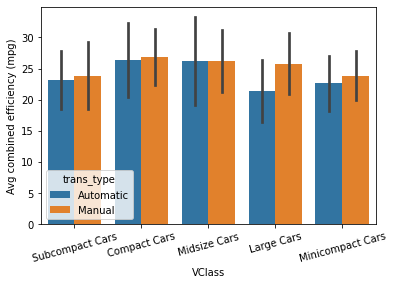

In [25]:
sns.barplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg combined efficiency (mpg)');

## boxplot variation (clustered boxplot)


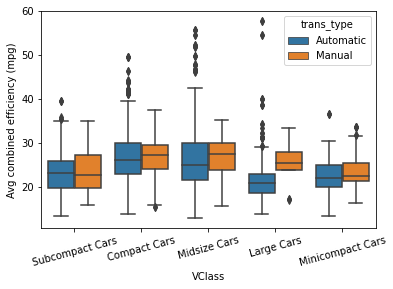

In [26]:
sns.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg combined efficiency (mpg)');

## Heatmap adaptations

making a heatmap so that instead of counts the squares represent the average of a third variable

#### normal heatmap with counts

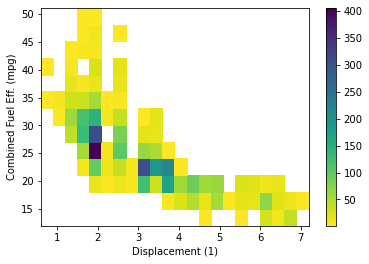

In [27]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 50+3, 3)
plt.hist2d(data = fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x,bins_y]);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

#### adding weights to change color to average of third variable

##### creating variable for weights

In [48]:
#use pd.cut to bin into distinct bucketd
'''
Use cut when you need to segment and sort data values into bins. 
This function is also useful for going from a continuous variable to a categorical variable. 
For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, 
or a pre-specified array of bins.
'''

displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest=False,
                             labels=False).astype(int)

comb_bins =  pd.cut(fuel_econ['comb'], bins_y, right= False, include_lowest=False, labels=False)#.astype(int)
#points that fall in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

co2_weights = fuel_econ['co2']/n_points[displ_bins, comb_bins]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Check the Other adaptations of Bivariate plots in Lesson 5

In [39]:
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int64

In [35]:
comb_bins =  pd.cut(fuel_econ['comb'], bins_y, right= False, include_lowest=False, labels=False)#.astype(int)

In [38]:
comb_bins

0        2.0
1        4.0
2        2.0
3        2.0
4        5.0
        ... 
3924     NaN
3925     9.0
3926    10.0
3927     3.0
3928     3.0
Name: comb, Length: 3929, dtype: float64

In [36]:
#points that fall in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()

In [37]:
n_points

displ  comb
0      7.0      3
       9.0      3
1      6.0      4
       7.0      8
2      5.0     42
               ..
19     1.0     20
       2.0     15
20     0.0     38
       1.0     13
21     1.0      2
Length: 85, dtype: int64

In [40]:
#resetting the index
n_points = n_points.reset_index()

,displ,comb,0
0,0,7.0,3
1,0,9.0,3
2,1,6.0,4
3,1,7.0,8
4,2,5.0,42
...,...,...,...
80,19,1.0,20
81,19,2.0,15
82,20,0.0,38
83,20,1.0,13


In [45]:
n_points.reset_index().pivot(index='displ', columns='comb')

0                                                                  \
comb   0.0   1.0    2.0    3.0    4.0    5.0    6.0   7.0   8.0   9.0  10.0   
displ                                                                         
0       NaN   NaN    NaN    NaN    NaN    NaN    NaN   3.0   NaN   3.0  NaN   
1       NaN   NaN    NaN    NaN    NaN    NaN    4.0   8.0   NaN   NaN  NaN   
2       NaN   NaN    NaN    NaN    NaN   42.0   62.0  31.0  15.0   7.0  4.0   
3       NaN   NaN    NaN    6.0   55.0  130.0  119.0  34.0   7.0   NaN  7.0   
4       NaN   NaN   15.0   98.0  405.0  311.0  145.0  55.0  14.0  26.0  6.0   
5       NaN   NaN    1.0   12.0    9.0    NaN    5.0   1.0   NaN   NaN  NaN   
6       NaN   NaN   11.0   37.0  105.0   82.0   37.0   5.0  15.0  17.0  NaN   
7       NaN   NaN    7.0    6.0    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
8       NaN   NaN  123.0  311.0   64.0   17.0    2.0   NaN   NaN   NaN  NaN   
9       NaN   NaN   32.0  190.0   52.0   14.0   18.0   NaN   NaN   NaN  NaN   
10      NaN   5.0  173.0  219.0    2.0    NaN    NaN   NaN   NaN   NaN  NaN   
11      NaN  22.0   58.0    4.0    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
12      NaN  48.0   92.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
13      1.0  15.0   59.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
14      NaN  55.0   64.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
15      NaN   4.0    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
16      3.0  17.0   24.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
17      NaN  16.0   20.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
18     29.0  70.0   12.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
19     10.0  20.0   15.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
20     38.0  13.0    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   
21      NaN   2.0    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN  NaN   

                  
comb   11.0 12.0  
displ             
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       2.0  4.0  
4      10.0  3.0  
5       NaN  NaN  
6       1.0  NaN  
7       NaN  NaN  
8       NaN  NaN  
9       NaN  NaN  
10      NaN  NaN  
11      NaN  NaN  
12      NaN  NaN  
13      NaN  NaN  
14      NaN  NaN  
15      NaN  NaN  
16      NaN  NaN  
17      NaN  NaN  
18      NaN  NaN  
19      NaN  NaN  
20      NaN  NaN  
21      NaN  NaN

In [46]:
n_points.reset_index().pivot(index='displ', columns='comb').values

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan],
       [ nan,  nan,  32., 190.,  52.,  14.,  18.,  nan,  nan,  nan,  nan,
         nan,  nan],
       [ nan,   5., 173., 219.,   2.,  nan,  nan, 